# we have used (Linear and SVM) Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score


# We are predicting total day charge based on other columns

In [2]:
def read_data():
    data = pd.read_csv("D:\Top_mentor_projects_Datasets-main\Telecom retention_Telco Company .csv")
    return data
data = read_data()

In [3]:
(data.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
print(data.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [6]:
print(data.describe())

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.21573

In [7]:
print(data.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [8]:
print(data.shape)

(2666, 20)


In [9]:
print(data.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [10]:
print(data.duplicated().sum())

0


In [11]:
# we are adding all charges in one column---

In [12]:
data['Total charges'] = data['Total day charge']+data['Total eve charge']+data['Total night charge']

In [13]:
#we are adding all minutes in one column---

In [14]:
data['Total minutes'] = data['Total day minutes']+data['Total eve minutes']+data['Total night minutes']

In [15]:
#we are adding all calls in one column---

In [16]:
data['Total calls'] = data['Total day calls']+data['Total eve calls']+data['Total night calls']

In [17]:
#so we are deleting those columns which we have added

In [18]:
data.drop(columns=['Total day charge','Total eve charge','Total night charge','Total day minutes','Total eve minutes','Total night minutes','Total day calls','Total eve calls','Total night calls'],inplace=True,axis=1)

In [19]:
data.drop(columns=['State','Churn'],inplace=True,axis=1)

In [20]:
data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total charges,Total minutes,Total calls
0,128,415,No,Yes,25,10.0,3,2.70,1,72.86,707.2,300
1,107,415,No,Yes,26,13.7,3,3.70,1,55.54,611.5,329
2,137,415,No,No,0,12.2,5,3.29,0,59.00,527.2,328
3,84,408,Yes,No,0,6.6,7,1.78,2,65.02,558.2,248
4,75,415,Yes,No,0,10.1,3,2.73,3,49.36,501.9,356


In [21]:
lb = LabelEncoder()

In [22]:
data['International plan'] = lb.fit_transform(data['International plan'])

In [23]:
data['Voice mail plan'] = lb.fit_transform(data['Voice mail plan'])

In [24]:
data.head(2)   ####    we have chenged thosevalues in 0 and 1

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total charges,Total minutes,Total calls
0,128,415,0,1,25,10.0,3,2.7,1,72.86,707.2,300
1,107,415,0,1,26,13.7,3,3.7,1,55.54,611.5,329


array([[<Axes: title={'center': 'Account length'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'International plan'}>],
       [<Axes: title={'center': 'Voice mail plan'}>,
        <Axes: title={'center': 'Number vmail messages'}>,
        <Axes: title={'center': 'Total intl minutes'}>],
       [<Axes: title={'center': 'Total intl calls'}>,
        <Axes: title={'center': 'Total intl charge'}>,
        <Axes: title={'center': 'Customer service calls'}>],
       [<Axes: title={'center': 'Total charges'}>,
        <Axes: title={'center': 'Total minutes'}>,
        <Axes: title={'center': 'Total calls'}>]], dtype=object)

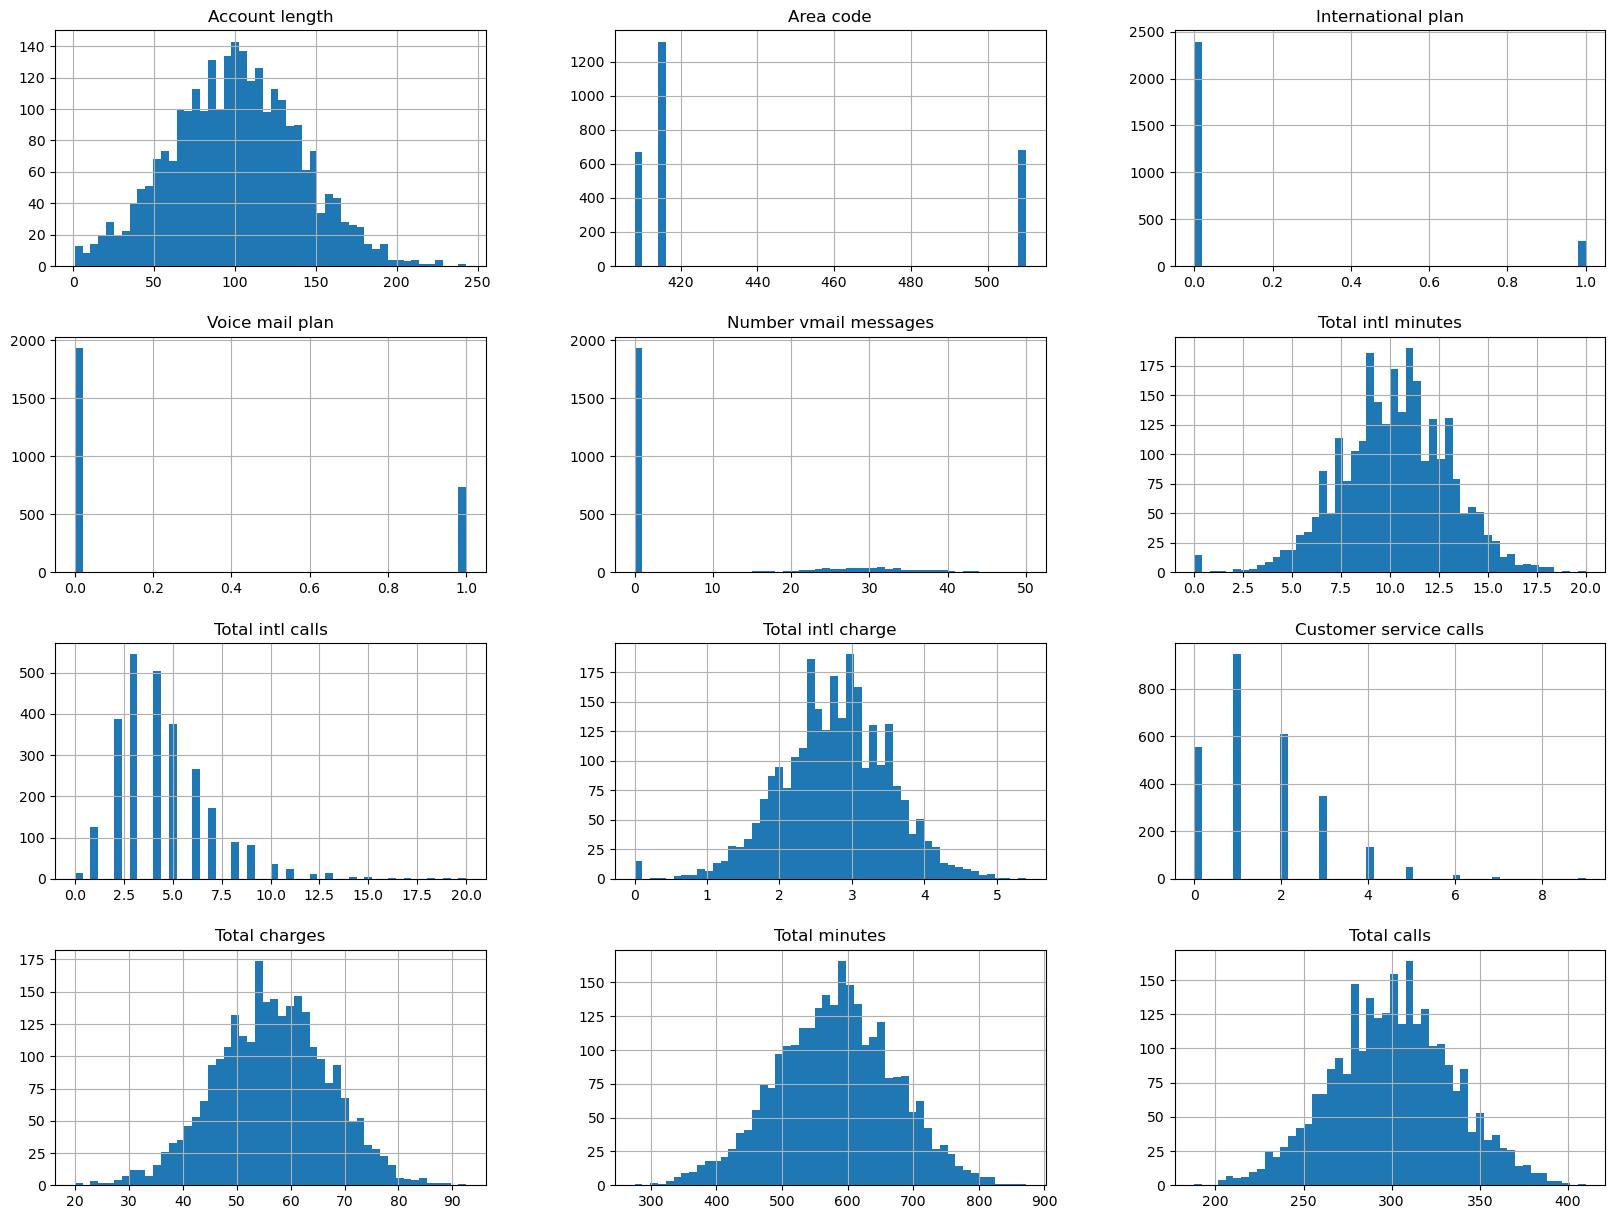

In [25]:
data.hist(bins=50,figsize=(20,15))

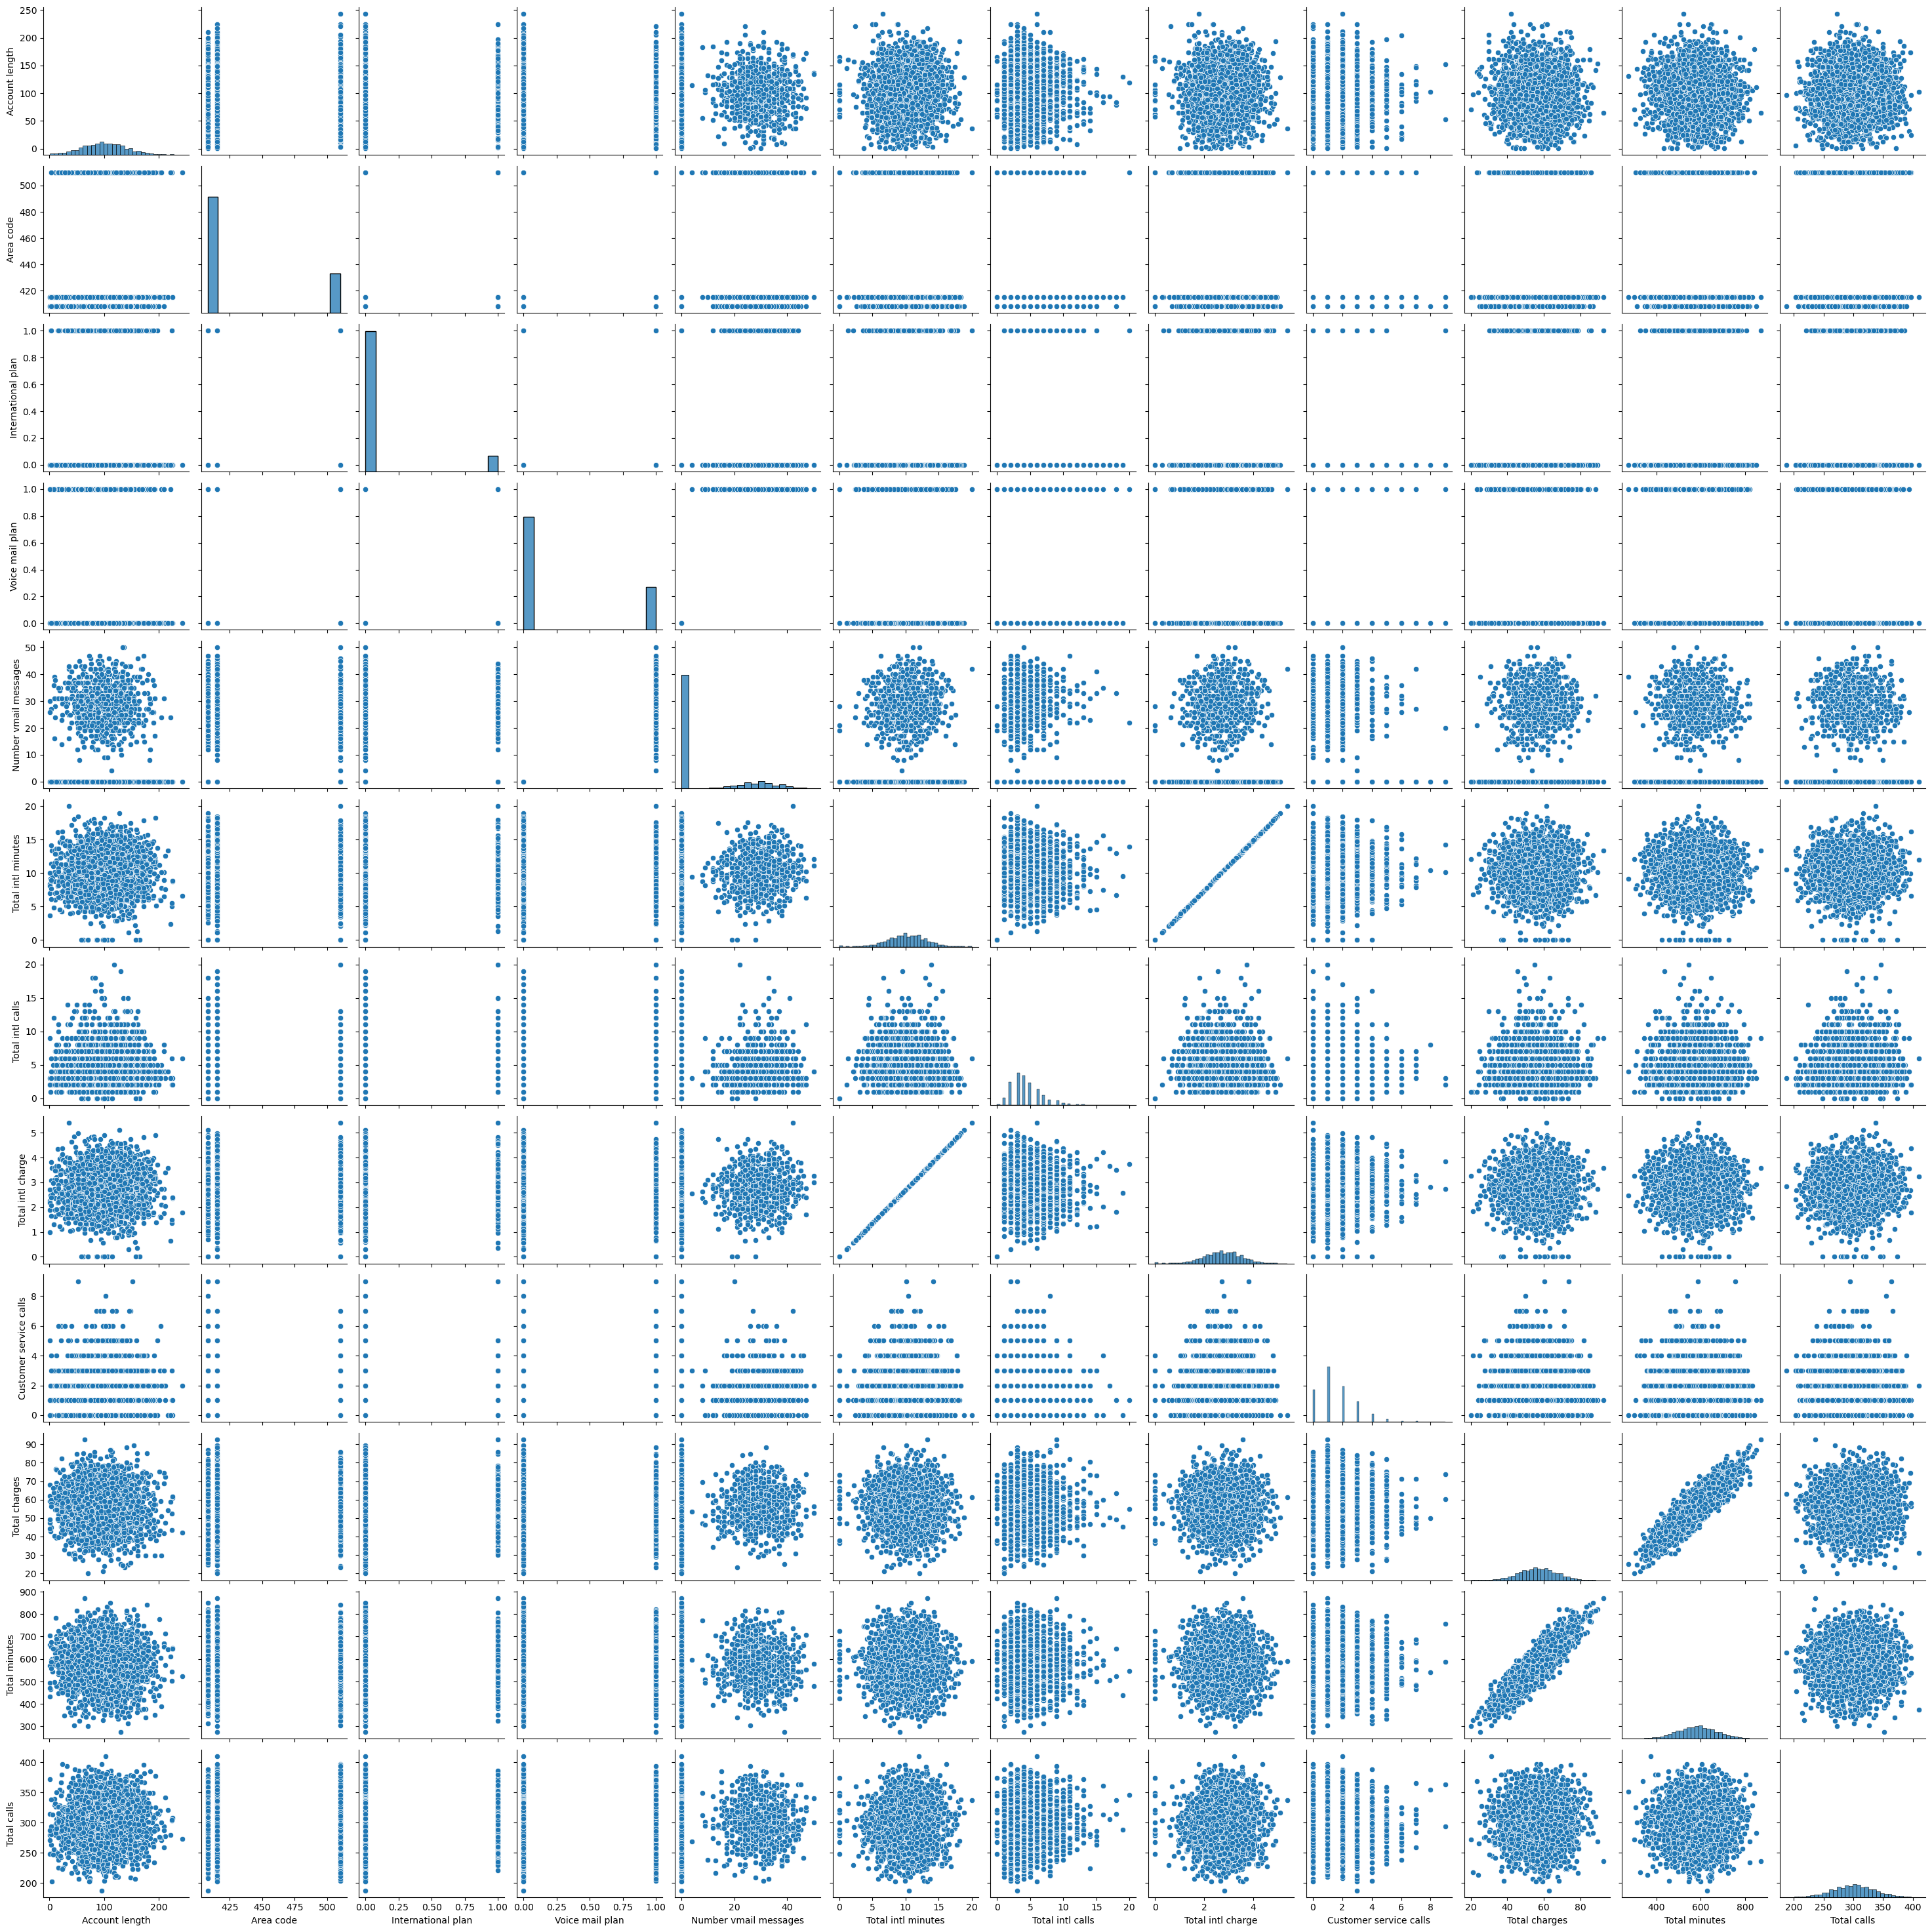

In [26]:
sns.pairplot(data)

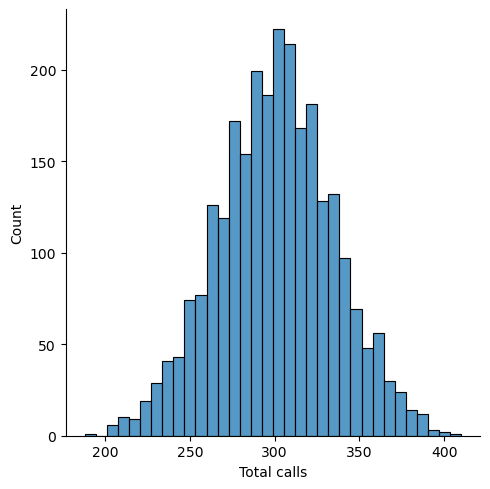

In [27]:
sns.displot(data,x ='Total calls')

In [28]:
round(data.corr()['Total charges'], 3)

Account length           -0.006
Area code                -0.021
International plan        0.052
Voice mail plan           0.020
Number vmail messages     0.021
Total intl minutes       -0.014
Total intl calls          0.006
Total intl charge        -0.014
Customer service calls   -0.026
Total charges             1.000
Total minutes             0.892
Total calls               0.017
Name: Total charges, dtype: float64

<Axes: >

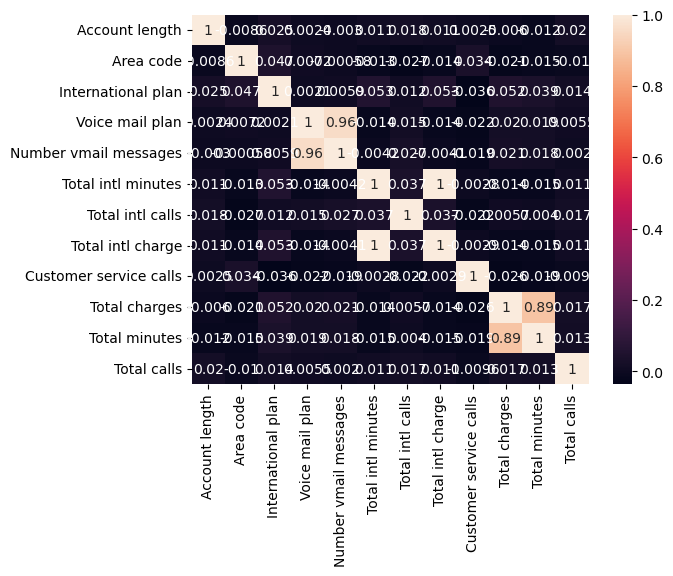

In [29]:
sns.heatmap(data.corr(),annot=True,)

we are taking only two columns because those are most valueable for our predction

In [30]:
x = data[['Total minutes','International plan']]
y = data['Total charges']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1234)

In [32]:
x_train.shape

(1599, 2)

In [33]:
model = LinearRegression()


In [34]:
model_train = model.fit(x_train,y_train)

In [35]:
pred = model_train.predict(x_test)

In [36]:
pred

array([43.86675622, 56.54744745, 59.01664617, ..., 42.05226647,
       58.53820192, 47.4749987 ])

In [37]:
print("Accuracy of the model is",round(r2_score(y_test,pred)*100,2))

Accuracy of the model is 78.46


In [38]:
rmse = mean_squared_error(y_test,pred)

In [39]:
rmse

22.532318664025727

In [40]:
###   so we dont need to use Ridge or Lasso becuse our model is performing well

In [42]:
model1 =SVR()

In [43]:
model1.fit(x_train,y_train)

SVR()

In [44]:
pred1 = model1.predict(x_test)

In [45]:
pred1

array([44.35318954, 56.50669251, 58.56851166, ..., 42.91198504,
       58.55762914, 47.50375889])

In [48]:
r2_score(y_test,pred1)

0.7780499329740599

In [52]:
 mean_squared_error(y_test,pred1)

23.21783202994732